In [1]:
import numpy as np
import pandas as pd
from math import isnan
from sklearn import preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C://Users//arjun//Clean_data.csv")

In [3]:
df.columns

Index(['month', 'hour', 'item_code', 'item_name', 'quantity', 'payment_type',
       'unit_buying_price', 'unit_selling_price', 'unit_price_margin',
       'total_buying_price', 'total_selling_price', 'total_profit', 'Date',
       'Time', 'main_category', 'sub_category', 'Day', 'Month', 'Year',
       'receipt_id'],
      dtype='object')

In [4]:
df2 = df

In [5]:
df3 = df2.groupby(['receipt_id']).count()

In [6]:
df3['receipt'] = df3.index

In [7]:
df3 = df3.reset_index()

In [8]:
df4 = pd.DataFrame([])

In [9]:
df4[['receipt_id', 'item_count']] = df3[['receipt', 'hour']]

In [10]:
df4

,receipt_id,item_count
0,0001c063-2d32-4380-9db6-de20c5b48f59,2
1,0002a81e-5e13-4e0f-95fd-2f4a46c997fb,5
2,0002d6fc-1efa-43de-ba27-a683a1ee7ab8,3
3,000321da-e88c-4156-ab78-ea46cbf178ed,3
4,00032d46-cf9e-4b0b-b003-2f6bb5ab3e85,1
...,...,...
99022,fffdf03b-eea7-487e-b298-44fd3f1189fa,4
99023,fffe5373-ab7d-40b3-9821-28334f34306c,1
99024,fffe8a4a-313d-4817-a94f-680cc27111fe,6
99025,fffee230-046f-4ad5-92e3-ef935ddc926d,1


In [11]:
#df2['basket_count'] = df3['month'].to_int()
df2['basket_count'] = df3['month'].apply(pd.to_numeric)

In [12]:
df2

,month,hour,item_code,item_name,quantity,payment_type,unit_buying_price,unit_selling_price,unit_price_margin,total_buying_price,...,total_profit,Date,Time,main_category,sub_category,Day,Month,Year,receipt_id,basket_count
0,7,8,2025.0,Kiwi fruit Green,0.546,cash,0.0,5.5,5.5,0.0,...,3.003,19-07-2018,08:40:13,Fresh Produce,Other Fruits,19,7,2018,c5341571-9ead-49bf-ae6d-3a7ddfbd0e31,2.0
1,6,16,2025.0,Kiwi fruit Green,0.546,cash,0.0,5.5,5.5,0.0,...,3.003,15-06-2018,16:01:07,Fresh Produce,Other Fruits,15,6,2018,f6d66747-85e2-4b43-99c3-3fc324ea02f7,5.0
2,9,9,2025.0,Kiwi fruit Green,0.548,cash,0.0,5.5,5.5,0.0,...,3.014,18-09-2018,09:01:37,Fresh Produce,Other Fruits,18,9,2018,5757fe87-17b3-44ff-ae49-7548cd156998,3.0
3,8,12,2025.0,Kiwi fruit Green,0.548,cash,0.0,5.5,5.5,0.0,...,3.014,14-08-2018,12:36:46,Fresh Produce,Other Fruits,14,8,2018,ccfec4ae-e68f-4f7f-a15d-486b98acbd09,3.0
4,6,17,2025.0,Kiwi fruit Green,0.550,cash,0.0,5.5,5.5,0.0,...,3.025,19-06-2018,17:03:58,Fresh Produce,Other Fruits,19,6,2018,9a45dc36-f771-42a7-a343-fac1a8e58bb7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372752,12,12,1039.0,Ginger,0.112,cash,0.0,10.0,10.0,0.0,...,1.120,06-12-2017,12:36:35,Fresh Produce,Other Veggies,6,12,2017,b390d52e-e396-40f4-838b-ce7a668216f8,NaN
372753,12,14,1039.0,Ginger,0.114,cash,0.0,10.0,10.0,0.0,...,1.140,01-12-2017,14:17:07,Fresh Produce,Other Veggies,1,12,2017,8da840d9-aca1-42cc-b299-010e46adff1c,NaN
372754,12,18,1039.0,Ginger,0.116,cash,0.0,10.0,10.0,0.0,...,1.160,12-12-2017,18:50:55,Fresh Produce,Other Veggies,12,12,2017,3a58145b-7e7c-42a9-9f32-fb64961e43e1,NaN
372755,12,12,1039.0,Ginger,0.116,cash,0.0,10.0,10.0,0.0,...,1.160,19-12-2017,12:35:53,Fresh Produce,Other Veggies,19,12,2017,020fd6c4-d155-47cd-a904-2c9e78fa9f4a,NaN


In [13]:
# sales over time
# df4 has item counts and receipt_id
# Df is the entire data

df_time = pd.merge(df4, df, on='receipt_id', how='inner')

In [14]:
df_time.columns

Index(['receipt_id', 'item_count', 'month', 'hour', 'item_code', 'item_name',
       'quantity', 'payment_type', 'unit_buying_price', 'unit_selling_price',
       'unit_price_margin', 'total_buying_price', 'total_selling_price',
       'total_profit', 'Date', 'Time', 'main_category', 'sub_category', 'Day',
       'Month', 'Year', 'basket_count'],
      dtype='object')

In [15]:
df_time = df_time[['receipt_id', 'month', 'hour', 'Year', 'item_count', 'Date', 'Time']]

In [16]:
df_time.shape

(372757, 7)

In [17]:
a = df_time.drop_duplicates()

In [18]:
a.to_csv("C://Users//arjun//Desktop//Dubshack//Questions//basket_analysis.csv", index = False)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df_time_basket = a.groupby(['hour']).mean()

In [21]:
df_time_basket

,month,Year,item_count
hour,,,
0,2.164574,2017.000000,3.482960
1,2.199027,2017.000000,3.462412
2,2.200105,2017.000000,3.538340
3,2.228099,2017.000000,3.300826
4,2.175559,2017.000000,3.409639
5,2.156463,2017.000000,3.333333
6,2.033622,2017.000000,3.476465
7,2.695341,2017.146953,3.179211
8,7.260000,2017.578621,3.766897


In [22]:
df_time_basket.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

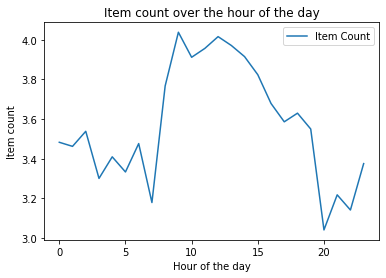

In [23]:
plt.plot(df_time_basket.index, df_time_basket['item_count'], label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Item count')
plt.title('Item count over the hour of the day')

# Show the legend
plt.legend()

# Show the graph
plt.show()

In [180]:
df_2017 = a

In [181]:
df_2017 = df_2017.groupby(['hour']).mean()

In [182]:
df_2017

,month,Year,item_count
hour,,,
0,2.164574,2017.000000,3.482960
1,2.199027,2017.000000,3.462412
2,2.200105,2017.000000,3.538340
3,2.228099,2017.000000,3.300826
4,2.175559,2017.000000,3.409639
5,2.156463,2017.000000,3.333333
6,2.033622,2017.000000,3.476465
7,2.695341,2017.146953,3.179211
8,7.260000,2017.578621,3.766897


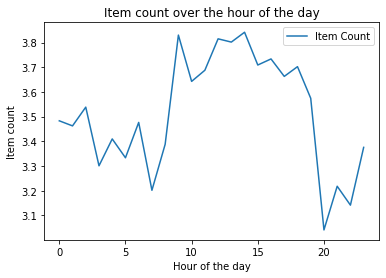

In [27]:
plt.plot(df_2017.index, df_2017.item_count, label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Item count')
plt.title('Item count over the hour of the day')

# Show the legend
plt.legend()

# Show the graph
plt.show()

In [187]:
df_2018 = a[(a.Year == 2018)]
df_2018 = df_2018.groupby(['hour']).mean()
df_2018
df_2018['item_count'].mean()

3.853039737165558

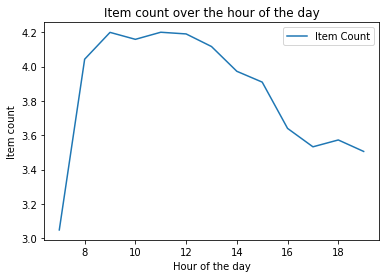

In [29]:
plt.plot(df_2018.index, df_2018.item_count, label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Item count')
plt.title('Item count over the hour of the day')

# Show the legend
plt.legend()

# Show the graph
plt.show()

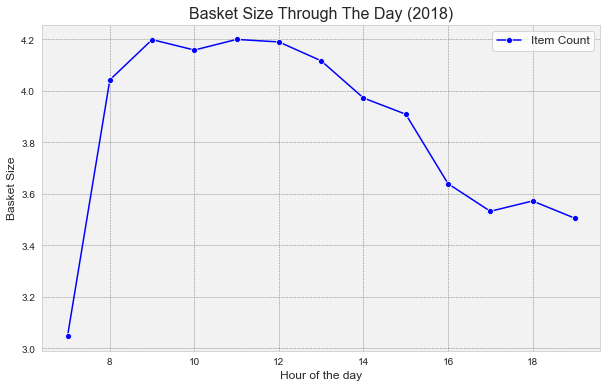

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with seaborn
sns.lineplot(x=df_2018.index, y=df_2018.item_count, color='blue', marker='o', label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Basket Size', fontsize=12)
plt.title('Basket Size Through The Day (2018)', fontsize=16)

plt.gca().set_facecolor('#f2f2f2')
# Add grid lines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Set font size of legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


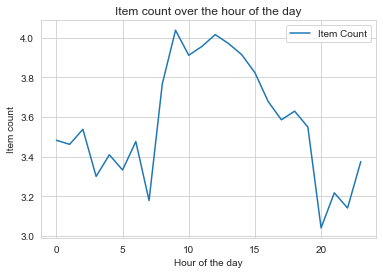

In [188]:
plt.plot(df_2017.index, df_2017.item_count, label='Item Count')
# Add labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Item count')
plt.title('Item count over the hour of the day')

# Show the legend
plt.legend()

# Show the graph
plt.show()

In [189]:
df_2017['item_count'].mean()

3.5750214669347673

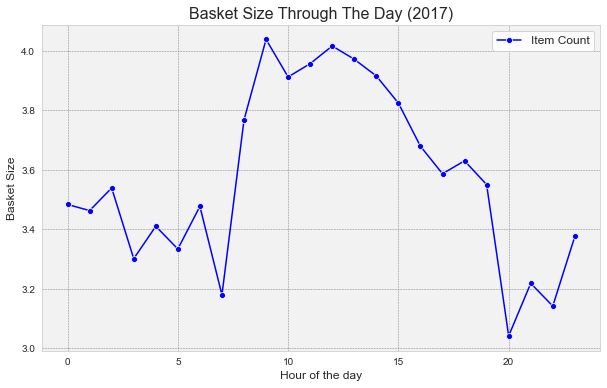

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with seaborn
sns.lineplot(x=df_2017.index, y=df_2017.item_count, color='blue', marker='o', label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Basket Size', fontsize=12)
plt.title('Basket Size Through The Day (2017)', fontsize=16)

plt.gca().set_facecolor('#f2f2f2')
# Add grid lines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Set font size of legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


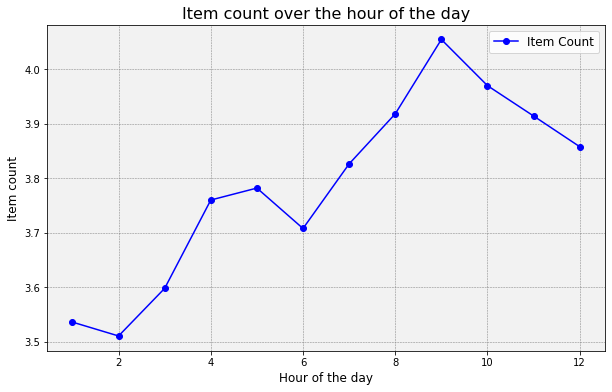

In [126]:
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with marker for each data point
plt.plot(df_2017.index, df_2017.item_count, color='blue', marker='o', label='Item Count')

# Add labels and title
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Item count', fontsize=12)
plt.title('Item count over the hour of the day', fontsize=16)

# Set background color
plt.gca().set_facecolor('#f2f2f2')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Set font size of legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


## Basket Size by Month

In [99]:
# Item Count by Month

df_months = a
df_months = a.groupby(['month']).mean()
df_months


,hour,Year,item_count
month,,,
1,11.084829,2017.468640,3.536263
2,10.934111,2017.441024,3.510834
3,11.121315,2017.435532,3.598155
4,12.442923,2017.387526,3.760115
5,13.136329,2017.381823,3.782048
6,13.142567,2017.432707,3.707967
7,13.324054,2017.463368,3.826395
8,13.397791,2017.482566,3.918153
9,13.401784,2017.500935,4.054540


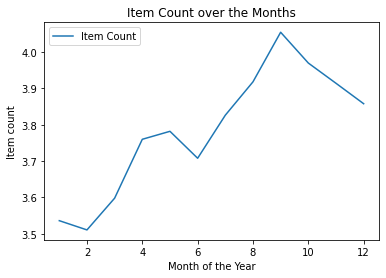

In [116]:
plt.plot(df_months.index, df_months.item_count, label='Item Count')

# Add labels and title
plt.xlabel('Month of the Year')
plt.ylabel('Item count')
plt.title('Item Count over the Months')

# Show the legend
plt.legend()

# Show the graph
plt.show()

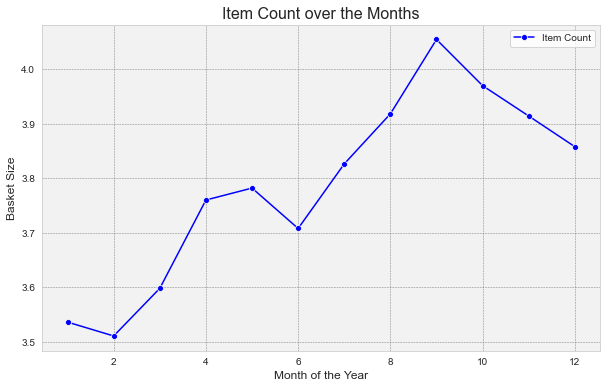

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with marker for each data point
sns.lineplot(x=df_months.index, y=df_months.item_count, marker='o', color='blue', label='Item Count')

# Add labels and title
plt.xlabel('Month of the Year', fontsize=12)
plt.ylabel('Basket Size', fontsize=12)
plt.title('Item Count over the Months', fontsize=16)
plt.gca().set_facecolor('#f2f2f2')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Set font size of legend

# Show the plot
plt.show()


In [112]:
df_visit_freq

,receipt_id,hour,Year,item_count,Date,Time
month,,,,,,
1,10810,10810,10810,10810,10810,10810
2,10199,10199,10199,10199,10199,10199
3,9974,9974,9974,9974,9974,9974
4,8033,8033,8033,8033,8033,8033
5,7988,7988,7988,7988,7988,7988
6,7393,7393,7393,7393,7393,7393
7,7903,7903,7903,7903,7903,7903
8,7514,7514,7514,7514,7514,7514
9,6949,6949,6949,6949,6949,6949


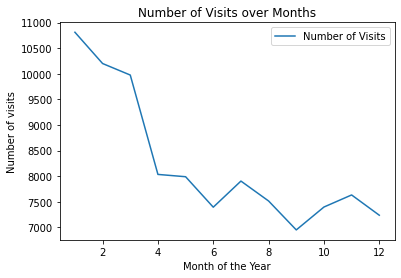

In [115]:
df_visit_freq = a
df_visit_freq = a.groupby(['month']).count()
df_visit_freq

plt.plot(df_visit_freq.index, df_visit_freq.receipt_id, label='Number of Visits')
# Add labels and title
plt.xlabel('Month of the Year')
plt.ylabel('Number of visits')
plt.title('Number of Visits over Months')

# Show the legend
plt.legend()

# Show the graph
plt.show()

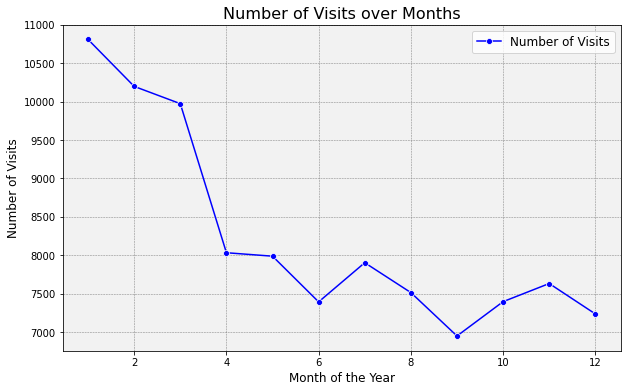

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by month and count number of visits
df_visit_freq = a.groupby(['month']).count()

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with marker for each data point
sns.lineplot(x=df_visit_freq.index, y=df_visit_freq.receipt_id, marker='o', color='blue', label='Number of Visits')

# Add labels and title
plt.xlabel('Month of the Year', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.title('Number of Visits over Months', fontsize=16)
plt.gca().set_facecolor('#f2f2f2')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
# Set font size of legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [117]:
a

,receipt_id,month,hour,Year,item_count,Date,Time
0,0001c063-2d32-4380-9db6-de20c5b48f59,1,1,2017,2,16-01-2017,01:54:07
2,0002a81e-5e13-4e0f-95fd-2f4a46c997fb,1,22,2017,5,25-01-2017,22:24:42
7,0002d6fc-1efa-43de-ba27-a683a1ee7ab8,5,17,2018,3,20-05-2018,17:28:28
10,000321da-e88c-4156-ab78-ea46cbf178ed,5,14,2017,3,08-05-2017,14:05:04
13,00032d46-cf9e-4b0b-b003-2f6bb5ab3e85,5,13,2017,1,02-05-2017,13:33:13
...,...,...,...,...,...,...,...
372742,fffdf03b-eea7-487e-b298-44fd3f1189fa,6,17,2018,4,06-06-2018,17:42:20
372746,fffe5373-ab7d-40b3-9821-28334f34306c,2,7,2017,1,03-02-2017,07:03:45
372747,fffe8a4a-313d-4817-a94f-680cc27111fe,3,15,2018,6,28-03-2018,15:51:37
372753,fffee230-046f-4ad5-92e3-ef935ddc926d,2,1,2017,1,23-02-2017,01:42:00


## Transaction Trends

In [70]:
# DF 2
df2.head()

,month,hour,item_code,item_name,quantity,payment_type,unit_buying_price,unit_selling_price,unit_price_margin,total_buying_price,...,total_profit,Date,Time,main_category,sub_category,Day,Month,Year,receipt_id,basket_count
0,7,8,2025.0,Kiwi fruit Green,0.546,cash,0.0,5.5,5.5,0.0,...,3.003,19-07-2018,08:40:13,Fresh Produce,Other Fruits,19,7,2018,c5341571-9ead-49bf-ae6d-3a7ddfbd0e31,2.0
1,6,16,2025.0,Kiwi fruit Green,0.546,cash,0.0,5.5,5.5,0.0,...,3.003,15-06-2018,16:01:07,Fresh Produce,Other Fruits,15,6,2018,f6d66747-85e2-4b43-99c3-3fc324ea02f7,5.0
2,9,9,2025.0,Kiwi fruit Green,0.548,cash,0.0,5.5,5.5,0.0,...,3.014,18-09-2018,09:01:37,Fresh Produce,Other Fruits,18,9,2018,5757fe87-17b3-44ff-ae49-7548cd156998,3.0
3,8,12,2025.0,Kiwi fruit Green,0.548,cash,0.0,5.5,5.5,0.0,...,3.014,14-08-2018,12:36:46,Fresh Produce,Other Fruits,14,8,2018,ccfec4ae-e68f-4f7f-a15d-486b98acbd09,3.0
4,6,17,2025.0,Kiwi fruit Green,0.550,cash,0.0,5.5,5.5,0.0,...,3.025,19-06-2018,17:03:58,Fresh Produce,Other Fruits,19,6,2018,9a45dc36-f771-42a7-a343-fac1a8e58bb7,1.0


In [71]:
df_payment_method = df2.groupby(['payment_type'])['total_selling_price'].sum()

In [72]:
df_payment_method

payment_type
cash       722075.033301
free           26.890640
magcard    353934.717054
Name: total_selling_price, dtype: float64

In [73]:
df_payment_method2 = df_payment_method.drop(index = 'free')

In [74]:
df_payment_method.drop(index = 'free')

payment_type
cash       722075.033301
magcard    353934.717054
Name: total_selling_price, dtype: float64

In [75]:
df['total_selling_price'].sum()

1076036.640994275

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


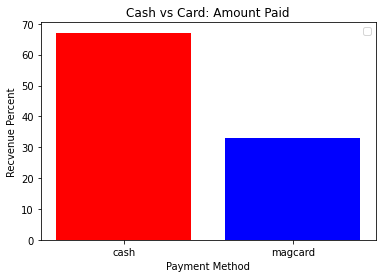

In [94]:
colors = ['red','blue']
plt.bar(df_payment_method2.index, df_payment_method2*100/sum(df_payment_method2), color = colors, label='')

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Recvenue Percent')
plt.title('Cash vs Card: Amount Paid')

# Show the legend
plt.legend()

# Show the graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


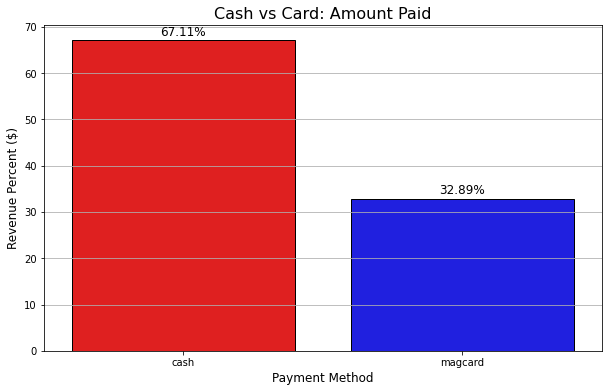

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percent of revenue for each payment method
percent_revenue = df_payment_method2 * 100 / sum(df_payment_method2)

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with dollar labels, percentage labels, and gridlines
sns.barplot(x=df_payment_method2.index, y=percent_revenue, palette=['red', 'blue'], edgecolor='black')
for index, value in enumerate(df_payment_method2):
    #plt.text(index, value*100/sum(df_payment_method2), f"${value:.2f}", ha='center', fontsize=12)
    plt.text(index, value*100/sum(df_payment_method2)+1, f"{percent_revenue[index]:.2f}%", ha='center', fontsize=12)
plt.gca().yaxis.grid(True)

# Add labels and title
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Percent ($)', fontsize=12)
plt.title('Cash vs Card: Amount Paid', fontsize=16)

# Remove legend
plt.legend().remove()

# Show the plot
plt.show()

In [84]:
df_payment_method_count = df2.groupby(['payment_type'])['receipt_id'].nunique()
df_payment_method_count = df_payment_method_count.drop(index = 'free')
df_payment_method_count

payment_type
cash       81012
magcard    18014
Name: receipt_id, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


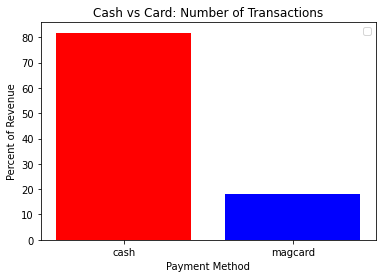

In [131]:
colors = ['red','blue']
plt.bar(df_payment_method_count.index, df_payment_method_count*100/sum(df_payment_method_count), color = colors, label='')

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Percent of Revenue')
plt.title('Cash vs Card: Number of Transactions')

# Show the legend
plt.legend()

# Show the graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


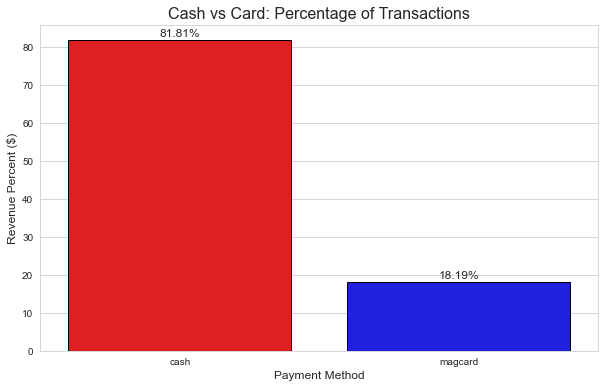

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percent of revenue for each payment method
percent_revenue = df_payment_method_count * 100 / sum(df_payment_method_count)

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with dollar labels, percentage labels, and gridlines
sns.barplot(x=df_payment_method_count.index, y=percent_revenue, palette=['red', 'blue'], edgecolor='black')
for index, value in enumerate(df_payment_method_count):
    #plt.text(index, value*100/sum(df_payment_method_count), f"${value:.2f}", ha='center', fontsize=12)
    plt.text(index, value*100/sum(df_payment_method_count)+1, f"{percent_revenue[index]:.2f}%", ha='center', fontsize=12)
plt.gca().yaxis.grid(True)

# Add labels and title
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Percent ($)', fontsize=12)
plt.title('Cash vs Card: Percentage of Transactions', fontsize=16)

# Remove legend
plt.legend().remove()

# Show the plot
plt.show()


In [95]:
df_pay_avg = df_payment_method2/df_payment_method_count
df_pay_avg

payment_type
cash        8.913186
magcard    19.647758
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


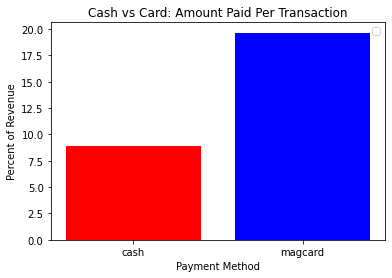

In [92]:
# Average payment per transaction channel
colors = ['red','blue']
plt.bar(df_pay_avg.index, df_pay_avg, color = colors, label='')

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Percent of Revenue')
plt.title('Cash vs Card: Amount Paid Per Transaction')

# Show the legend
plt.legend()

# Show the graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


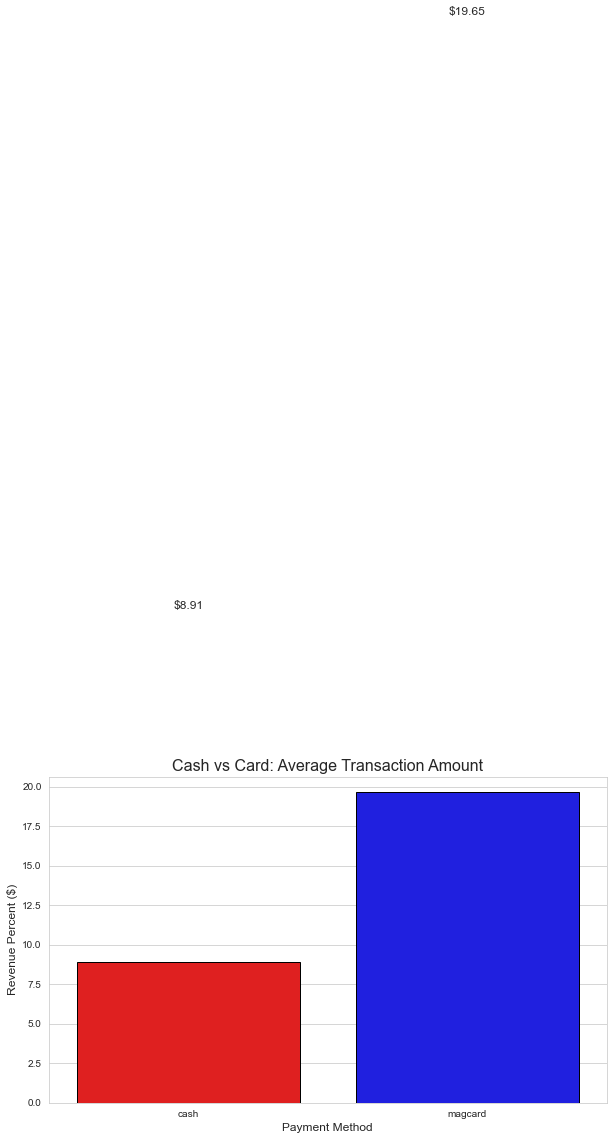

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percent of revenue for each payment method
percent_revenue = df_pay_avg * 100 / sum(df_pay_avg)

# Set plot size
plt.figure(figsize=(10, 6))

# Create plot with dollar labels, percentage labels, and gridlines
sns.barplot(x=df_pay_avg.index, y=df_pay_avg, palette=['red', 'blue'], edgecolor='black')
for index, value in enumerate(df_pay_avg):
    plt.text(index, value*100/sum(df_pay_avg), f"${value:.2f}", ha='center', fontsize=12)
    #plt.text(index, value*100/sum(df_pay_avg)+1, f"{percent_revenue[index]:.2f}%", ha='center', fontsize=12)
plt.gca().yaxis.grid(True)

# Add labels and title
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Revenue Percent ($)', fontsize=12)
plt.title('Cash vs Card: Average Transaction Amount', fontsize=16)

# Remove legend
plt.legend().remove()

# Show the plot
plt.show()


C:\Users\arjun\AppData\Local\Temp\ipykernel_5448\1491548443.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_pay_avg.index, fontsize=12)


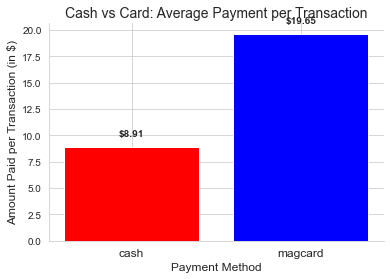

In [159]:
import seaborn as sns

# Set the style
sns.set_style('whitegrid')

# Create the bar chart
fig, ax = plt.subplots()

colors = ['red', 'blue']
ax.bar(df_pay_avg.index, df_pay_avg, color=colors)

# Add value labels to the bars
for i, v in enumerate(df_pay_avg):
    ax.text(i, v+1, f'${v:.2f}', ha='center', fontweight='bold')

# Add labels and title
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Amount Paid per Transaction (in $)', fontsize=12)
ax.set_title('Cash vs Card: Average Payment per Transaction', fontsize=14)

# Adjust the x-axis labels
ax.set_xticklabels(df_pay_avg.index, fontsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the graph
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_5448\1548944127.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_pay_avg.index, fontsize=12)


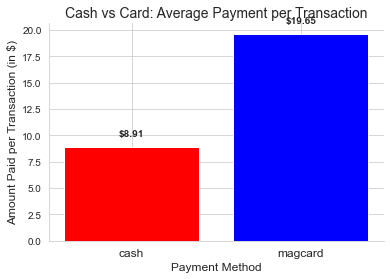

In [142]:
import seaborn as sns

# Set the style
sns.set_style('whitegrid')

# Create the bar chart
fig, ax = plt.subplots()
colors = ['red', 'blue']
ax.bar(df_pay_avg.index, df_pay_avg, color=colors)

# Add value labels to the bars
for i, v in enumerate(df_pay_avg):
    ax.text(i, v+1, f'${v:.2f}', ha='center', fontweight='bold')

# Add labels and title
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Amount Paid per Transaction (in $)', fontsize=12)
ax.set_title('Cash vs Card: Average Payment per Transaction', fontsize=14)

# Adjust the x-axis labels
ax.set_xticklabels(df_pay_avg.index, fontsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the graph
plt.show()
